In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import numpy as np
import re
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv("forms_0620.csv")
columns = ["timestamp", 
           "grade", 
           "faculty", 
           "sex", 
           "living", 
           "f2_no3", 
           "no2_f3", 
           "f2_f3", 
           "frequency_c", 
           "average_payment", 
           "when_to_use", 
           "n_of_people", 
           "reasons_for_using_c", 
           "reasons_for_not_using_c", 
           "frequently_chose_menu", 
           "good_points_of_c", 
           "bad_points_of_c", 
           "impression_of_c", 
           "frequency_b", 
           "preference_b_vs_c", 
           "where_to_eat_b", 
           "preference_e_vs_w", 
           "reasons_e_vs_w", 
           "using_app", 
           "reasons_for_using_app", 
           "how_to_deposit", 
           "reasons_for_not_using_app", 
           "desirable_features"]
df1 = df.set_axis(columns, axis="columns", copy=True)
df2 = df1.drop(columns="timestamp")
df3 = df2.replace({"": float("nan")})

In [3]:
df3

grade faculty sex         living f2_no3 no2_f3 f2_f3 frequency_c  \
0   Â≠¶ÈÉ®3Âπ¥     ÂïÜÂ≠¶ÈÉ®  Áî∑ÊÄß   ‰∏Ä‰∫∫ÊöÆ„Çâ„ÅóÔºàËá™ÁÇä„Çí„Åô„ÇãÔºâ     „Å™„Åó     „Å™„Åó    „Å™„Åó          0Âõû   
1   Â≠¶ÈÉ®4Âπ¥     ÂïÜÂ≠¶ÈÉ®  Áî∑ÊÄß  ‰∏Ä‰∫∫ÊöÆ„Çâ„ÅóÔºàËá™ÁÇä„Çí„Åó„Å™„ÅÑÔºâ     „Å™„Åó    ÈÄ±ÔºëÂõû    „Å™„Åó          0Âõû   
2   Â≠¶ÈÉ®3Âπ¥     ÂïÜÂ≠¶ÈÉ®  Áî∑ÊÄß          ÂÆüÂÆ∂ÊöÆ„Çâ„Åó     „Å™„Åó    ÈÄ±ÔºíÂõû    „Å™„Åó          0Âõû   
3   Â≠¶ÈÉ®3Âπ¥     ÂïÜÂ≠¶ÈÉ®  Áî∑ÊÄß   ‰∏Ä‰∫∫ÊöÆ„Çâ„ÅóÔºàËá™ÁÇä„Çí„Åô„ÇãÔºâ     „Å™„Åó    ÈÄ±ÔºëÂõû    „Å™„Åó        Ôºí„ÄúÔºìÂõû   
4   Â≠¶ÈÉ®2Âπ¥    Á§æ‰ºöÂ≠¶ÈÉ®  Â•≥ÊÄß          ÂÆüÂÆ∂ÊöÆ„Çâ„Åó     „Å™„Åó    ÈÄ±ÔºíÂõû   ÈÄ±ÔºëÂõû          ÔºëÂõû   
..   ...     ...  ..            ...    ...    ...   ...         ...   
91  Â≠¶ÈÉ®3Âπ¥     ÂïÜÂ≠¶ÈÉ®  Áî∑ÊÄß  ‰∏Ä‰∫∫ÊöÆ„Çâ„ÅóÔºàËá™ÁÇä„Çí„Åó„Å™„ÅÑÔºâ    ÈÄ±ÔºìÂõû    ÈÄ±ÔºëÂõû    „Å™„Åó        Ôºí„ÄúÔºìÂõû   
92  Â≠¶ÈÉ®3Âπ¥     ÂïÜÂ≠¶ÈÉ®  Áî∑ÊÄß          ÂÆüÂÆ∂ÊöÆ„Çâ„Åó     „Å™„Åó    ÈÄ±ÔºëÂõû    „Å™„Åó        Ôºí„ÄúÔºìÂõû   
93  Â≠¶ÈÉ®4Âπ¥     ÂïÜÂ≠¶ÈÉ®  Â•≥ÊÄß          ÂÆüÂÆ∂ÊöÆ„Çâ„Åó     „Å™„Åó    ÈÄ±ÔºíÂõû   ÈÄ±ÔºëÂõû          0Âõû   
94  Â≠¶ÈÉ®3Âπ¥     ÂïÜÂ≠¶ÈÉ®  Â•≥ÊÄß          ÂÆüÂÆ∂ÊöÆ„Çâ„Åó    ÈÄ±ÔºëÂõû    ÈÄ±ÔºëÂõû   ÈÄ±ÔºëÂõû          ÔºëÂõû   
95  Â≠¶ÈÉ®3Âπ¥     ÂïÜÂ≠¶ÈÉ®  Â•≥ÊÄß          ÂÆüÂÆ∂ÊöÆ„Çâ„Åó     „Å™„Åó    ÈÄ±ÔºëÂõû    „Å™„Åó          0Âõû   

   average_payment                                        when_to_use  ...  \
0        500ÂÜÜ„Äú800ÂÜÜ                                              Âà©Áî®„Åó„Å™„ÅÑ  ...   
1            Âà©Áî®„Åó„Å™„ÅÑ                                              Âà©Áî®„Åó„Å™„ÅÑ  ...   
2        500ÂÜÜ„Äú800ÂÜÜ  11:30~11:45, 11:45~12:00, 12:00~12:15, 12:15~1...  ...   
3        300ÂÜÜ„Äú500ÂÜÜ                                   12:45~13:00, Â§úÂñ∂Ê•≠  ...   
4        300ÂÜÜ„Äú500ÂÜÜ               „Éë„É≥„Ç∑„Éß„ÉÉ„Éó„ÅÆ„ÅøÂà©Áî®, 12:00~12:15, 12:15~12:30  ...   
..             ...                                                ...  ...   
91       500ÂÜÜ„Äú800ÂÜÜ  12:30~12:45, 12:45~13:00, 13:00~13:15, 13:15~1...  ...   
92       300ÂÜÜ„Äú500ÂÜÜ              12:00~12:15, 12:15~12:30, 12:30~12:45  ...   
93           Âà©Áî®„Åó„Å™„ÅÑ                                              Âà©Áî®„Åó„Å™„ÅÑ  ...   
94       300ÂÜÜ„Äú500ÂÜÜ                           12:30~12:45, 12:45~13:00  ...   
95       500ÂÜÜ„Äú800ÂÜÜ                                              Âà©Áî®„Åó„Å™„ÅÑ  ...   

   frequency_b preference_b_vs_c where_to_eat_b preference_e_vs_w  \
0          ÈÄ±ÔºêÂõû            „Éë„É≥„Ç∑„Éß„ÉÉ„Éó        Ê¨°„ÅÆÊéàÊ•≠„ÅÆÊïôÂÆ§               Ë•øÂ≠¶È£ü   
1          ÈÄ±ÔºêÂõû        „Å©„Å°„Çâ„ÇÇÂ•Ω„Åç„Åß„ÅØ„Å™„ÅÑ          Â≠¶È£üÂÜÖ„ÅÆÂ∏≠        „Å©„Å°„Çâ„ÇÇÂ•Ω„Åç„Åß„ÅØ„Å™„ÅÑ   
2          ÈÄ±ÔºêÂõû                Â≠¶È£ü          Â≠¶È£üÂÜÖ„ÅÆÂ∏≠               Êù±Â≠¶È£ü   
3          ÈÄ±ÔºëÂõû                Â≠¶È£ü          „Åù„ÅÆ‰ªñÊïôÂÆ§               Êù±Â≠¶È£ü   
4        ÈÄ±Ôºí„ÄúÔºìÂõû            „Éë„É≥„Ç∑„Éß„ÉÉ„Éó        Ê¨°„ÅÆÊéàÊ•≠„ÅÆÊïôÂÆ§               Êù±Â≠¶È£ü   
..         ...               ...            ...               ...   
91       ÈÄ±Ôºí„ÄúÔºìÂõû        „Å©„Å°„Çâ„ÇÇÂ•Ω„Åç„Åß„ÅØ„Å™„ÅÑ          „Åù„ÅÆ‰ªñÊïôÂÆ§               Ë•øÂ≠¶È£ü   
92         ÈÄ±ÔºêÂõû                Â≠¶È£ü          Â§ñ„ÅÆ„Éô„É≥„ÉÅ               Êù±Â≠¶È£ü   
93       ÈÄ±Ôºí„ÄúÔºìÂõû            „Éë„É≥„Ç∑„Éß„ÉÉ„Éó        Ê¨°„ÅÆÊéàÊ•≠„ÅÆÊïôÂÆ§        „Å©„Å°„Çâ„ÇÇÂ•Ω„Åç„Åß„ÅØ„Å™„ÅÑ   
94         ÈÄ±ÔºëÂõû        „Å©„Å°„Çâ„ÇÇÂ•Ω„Åç„Åß„ÅØ„Å™„ÅÑ        Ê¨°„ÅÆÊéàÊ•≠„ÅÆÊïôÂÆ§               Êù±Â≠¶È£ü   
95         ÈÄ±ÔºêÂõû                Â≠¶È£ü        Ê¨°„ÅÆÊéàÊ•≠„ÅÆÊïôÂÆ§               Êù±Â≠¶È£ü   

                      reasons_e_vs_w using_app reasons_for_using_app  \
0                                 Á´ãÂú∞       „ÅÑ„ÅÑ„Åà                   NaN   
1                                NaN        „ÅØ„ÅÑ                ÊîØÊâï„ÅÑ„Åå‰æøÂà©   
2                           „É°„Éã„É•„ÉºÊï∞„ÅåÂ§ö„ÅÑ       „ÅÑ„ÅÑ„Åà                   NaN   
3   Â∏≠Êï∞

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   grade                      96 non-null     object
 1   faculty                    96 non-null     object
 2   sex                        96 non-null     object
 3   living                     96 non-null     object
 4   f2_no3                     96 non-null     object
 5   no2_f3                     96 non-null     object
 6   f2_f3                      96 non-null     object
 7   frequency_c                96 non-null     object
 8   average_payment            96 non-null     object
 9   when_to_use                96 non-null     object
 10  n_of_people                96 non-null     object
 11  reasons_for_using_c        96 non-null     object
 12  reasons_for_not_using_c    96 non-null     object
 13  frequently_chose_menu      96 non-null     object
 14  good_points_

In [5]:
r, c = df2.shape
column_names = list(df2.columns)
for i in range(c):
    print(column_names[i], ": ", set(df2[column_names[i]]))

grade :  {'Èô¢Áîü', 'Â≠¶ÈÉ®4Âπ¥', 'Â≠¶ÈÉ®3Âπ¥', 'Â≠¶ÈÉ®2Âπ¥', 'Â≠¶ÈÉ®1Âπ¥'}
faculty :  {'ÁµåÊ∏àÂ≠¶ÈÉ®', '„ÇΩ„Éº„Ç∑„É£„É´„Éª„Éá„Éº„Çø„Éª„Çµ„Ç§„Ç®„É≥„ÇπÂ≠¶ÈÉ®', 'Â§ßÂ≠¶Èô¢', 'ÂïÜÂ≠¶ÈÉ®', 'Ê≥ïÂ≠¶ÈÉ®', 'Á§æ‰ºöÂ≠¶ÈÉ®'}
sex :  {'Â•≥ÊÄß', 'Áî∑ÊÄß'}
living :  {'ÂØÆÊöÆ„Çâ„ÅóÔºàÈ£ü‰∫ã„ÅåÂá∫„Å™„ÅÑÔºâ', '‰∏Ä‰∫∫ÊöÆ„Çâ„ÅóÔºàËá™ÁÇä„Çí„Åó„Å™„ÅÑÔºâ', '‰∏Ä‰∫∫ÊöÆ„Çâ„ÅóÔºàËá™ÁÇä„Çí„Åô„ÇãÔºâ', 'ÂØÆÊöÆ„Çâ„ÅóÔºàÈ£ü‰∫ã„ÅåÂá∫„ÇãÔºâ', 'ÂÆüÂÆ∂ÊöÆ„Çâ„Åó'}
f2_no3 :  {'ÈÄ±ÔºíÂõû', 'ÈÄ±ÔºìÂõû', 'ÈÄ±ÔºïÂõû', '„Å™„Åó', 'ÈÄ±ÔºëÂõû'}
no2_f3 :  {'ÈÄ±ÔºíÂõû', '„Å™„Åó', 'ÈÄ±ÔºëÂõû', 'ÈÄ±ÔºìÂõû'}
f2_f3 :  {'ÈÄ±ÔºíÂõû', 'ÈÄ±ÔºìÂõû', 'ÈÄ±ÔºïÂõû', 'ÈÄ±ÔºîÂõû', '„Å™„Åó', 'ÈÄ±ÔºëÂõû'}
frequency_c :  {'0Âõû', 'Ôºí„ÄúÔºìÂõû', 'ÔºîÂõû‰ª•‰∏ä', 'ÔºëÂõû'}
average_payment :  {'Âà©Áî®„Åó„Å™„ÅÑ', '500ÂÜÜ„Äú800ÂÜÜ', '300ÂÜÜ„Äú500ÂÜÜ', '„Äú300ÂÜÜ', '800ÂÜÜ„Äú1000ÂÜÜ', '1000ÂÜÜ„Äú'}
when_to_use :  {'12:00~12:15, 12:15~12:30', '12:15~12:30, 12:30~12:45, 12:45~13:00', '12:45~13:00, 13:00~13:15, 13:15~13:30, 13:30~13:45, 13:45~14:00, 14:00~14:

In [6]:
df4 = df3.replace({"grade": {'Â≠¶ÈÉ®4Âπ¥': "B4", 'Â≠¶ÈÉ®3Âπ¥': "B3", 'Â≠¶ÈÉ®2Âπ¥': "B2", 'Èô¢Áîü': "Master", 'Â≠¶ÈÉ®1Âπ¥': "B1"}, 
                   "faculty": {'Á§æ‰ºöÂ≠¶ÈÉ®': "Soc", '„ÇΩ„Éº„Ç∑„É£„É´„Éª„Éá„Éº„Çø„Éª„Çµ„Ç§„Ç®„É≥„ÇπÂ≠¶ÈÉ®': "SDS", 'Â§ßÂ≠¶Èô¢': "Grad", 'Ê≥ïÂ≠¶ÈÉ®': "Law", 'ÂïÜÂ≠¶ÈÉ®': "Com", 'ÁµåÊ∏àÂ≠¶ÈÉ®': "Econ"}, 
                   "sex": {'Áî∑ÊÄß': "m", 'Â•≥ÊÄß': "f"}, 
                   "living": {'‰∏Ä‰∫∫ÊöÆ„Çâ„ÅóÔºàËá™ÁÇä„Çí„Åó„Å™„ÅÑÔºâ': "1‰∫∫ÊöÆ„Çâ„ÅóÔºàËá™ÁÇä„ÅÇ„ÇäÔºâ", 
                              '‰∏Ä‰∫∫ÊöÆ„Çâ„ÅóÔºàËá™ÁÇä„Çí„Åô„ÇãÔºâ': "1‰∫∫ÊöÆ„Çâ„ÅóÔºàËá™ÁÇä„Å™„ÅóÔºâ", 
                              'ÂØÆÊöÆ„Çâ„ÅóÔºàÈ£ü‰∫ã„ÅåÂá∫„Å™„ÅÑÔºâ': "ÂØÆÔºàÈ£ü‰∫ã„Å™„ÅóÔºâ", 
                              'ÂØÆÊöÆ„Çâ„ÅóÔºàÈ£ü‰∫ã„ÅåÂá∫„ÇãÔºâ': "ÂØÆÔºàÈ£ü‰∫ã‰ªò„ÅçÔºâ"}, 
                   "f2_no3": {'ÈÄ±ÔºíÂõû': 2, 'ÈÄ±ÔºìÂõû': 3, 'ÈÄ±ÔºëÂõû': 1, '„Å™„Åó': 0, 'ÈÄ±ÔºïÂõû': 5}, 
                   "no2_f3": {'ÈÄ±ÔºíÂõû': 2, 'ÈÄ±ÔºìÂõû': 3, '„Å™„Åó': 0, 'ÈÄ±ÔºëÂõû': 1}, 
                   "f2_f3": {'ÈÄ±ÔºíÂõû': 2, 'ÈÄ±ÔºìÂõû': 3, 'ÈÄ±ÔºëÂõû': 1, '„Å™„Åó': 0, 'ÈÄ±ÔºîÂõû': 4, 'ÈÄ±ÔºïÂõû': 5}, 
                   "frequency_c": {'Ôºí„ÄúÔºìÂõû': 2, '0Âõû': 0, 'ÔºîÂõû‰ª•‰∏ä': 3, 'ÔºëÂõû': 1}, 
                   "average_payment": {'1000ÂÜÜ„Äú': 5, '„Äú300ÂÜÜ': 1, '500ÂÜÜ„Äú800ÂÜÜ': 3, '800ÂÜÜ„Äú1000ÂÜÜ': 4, 'Âà©Áî®„Åó„Å™„ÅÑ': 0, '300ÂÜÜ„Äú500ÂÜÜ': 2}, 
                   "n_of_people": {'1‰∫∫': 1, 'Âà©Áî®„Åó„Å™„ÅÑ': 0, '2ÔΩû3‰∫∫': 2, '4‰∫∫‰ª•‰∏ä': 3}, 
                   "frequency_b": {'Êúà2„Äú3Âõû': 1, 'ÈÄ±Ôºí„ÄúÔºìÂõû': 3, 'ÈÄ±ÔºêÂõû': 0, 'ÈÄ±ÔºîÂõû‰ª•‰∏ä': 4, 'ÈÄ±ÔºëÂõû': 2, 'Êúà1ÂõûÁ®ãÂ∫¶„ÄÇÈÉ®Ê¥ªÂæå„Å´„Ç¢„Ç§„ÇπÈ£ü„Åπ„Åü„Çä„ÅØ„Åó„Å°„ÇÉ„ÅÑ„Åæ„Åô„ÄÇ': 1}, 
                   "preference_b_vs_c": {'„Å©„Å°„Çâ„ÇÇÂ•Ω„Åç„Åß„ÅØ„Å™„ÅÑ': "‰∏°ÊñπÂ´å„ÅÑ", 'Â•Ω„ÅçÂ´å„ÅÑÁÑ°„Åè„Å©„Å°„Çâ„ÇÇÂà©Áî®„Åô„Çã': "‰∏°ÊñπÂ•Ω„Åç"}, 
                   "preference_e_vs_w": {'„Å©„Å°„Çâ„ÇÇÂ•Ω„Åç„Åß„ÅØ„Å™„ÅÑ': "‰∏°ÊñπÂ´å„ÅÑ", '„Å©„Å°„Çâ„ÇÇÂ•Ω„Åç„ÄÇ': "‰∏°ÊñπÂ•Ω„Åç"}, 
                   "how_to_deposit": {'„Ç¢„Éó„É™Â∞éÂÖ•ÊôÇ„Å´Â≠¶È£ü„Ç´„Éº„ÉâÔºü„ÅÆÊÆãÈáë„ÇíÁßªË°å„Åó„Åü„ÅÆ„ÅåÊÆã„Å£„Å¶„ÅÑ„Çã„Åü„ÇÅ‰Ωø„Å£„Å¶„ÅÑ„Çã„ÄÇ‰Ωø„ÅÑÂàá„Å£„Åü„Çâ‰ΩøÁî®„Åó„Å™„ÅÑ„Å®ÊÄù„ÅÜ„ÄÇ': "ÂÖ•Èáë„Åó„Å™„ÅÑ", 
                                      'ÂÖ•Â≠¶„Åó„ÅüÊôÇ„Å´„ÉÅ„É£„Éº„Ç∏„Åó„Åü„Å†„Åë': "ÂÖ•Èáë„Åó„Å™„ÅÑ", 
                                      '„ÇØ„É¨„Ç´ÂÖ•ÈáëÔºàËá™ÂàÜ„ÅÆ„ÅäÈáëÔºâ': "„ÇØ„É¨„Ç´ÔºàËá™Ôºâ", 
                                      '„Ç≥„É≥„Éì„ÉãÂÖ•ÈáëÔºàËá™ÂàÜ„ÅÆ„ÅäÈáëÔºâ': "„Ç≥„É≥„Éì„ÉãÔºàËá™Ôºâ", 
                                      'ÁîüÂçî„É¨„Ç∏„Åß„ÉÅ„É£„Éº„Ç∏ÔºàËá™ÂàÜ„ÅÆ„ÅäÈáëÔºâ': "ÁîüÂçî„É¨„Ç∏ÔºàËá™Ôºâ", 
                                      '„ÇØ„É¨„Ç´ÂÖ•ÈáëÔºàË¶™„ÅÆ„ÅäÈáëÔºâ': "„ÇØ„É¨„Ç´ÔºàË¶™Ôºâ", 
                                      '„Ç≥„É≥„Éì„ÉãÂÖ•ÈáëÔºàË¶™„ÅÆ„ÅäÈáëÔºâ': "„Ç≥„É≥„Éì„ÉãÔºàË¶™Ôºâ", 
                                      'ÁîüÂçî„É¨„Ç∏„Åß„ÉÅ„É£„Éº„Ç∏ÔºàË¶™„ÅÆ„ÅäÈáëÔºâ': "ÁîüÂçî„É¨„Ç∏ÔºàË¶™Ôºâ"}, 
                   "where_to_eat_b": {'Â§ñ„ÅÆ„Éô„É≥„ÉÅ': "Â§ñ", 'Ë≤∑„Çè„Å™„ÅÑ': "Âà©Áî®„Åó„Å™„ÅÑ", 'È£ü„ÅπÊ≠©„Åç': "Â§ñ"}})

C:\Users\thiyo\AppData\Local\Temp\ipykernel_27048\80086376.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4 = df3.replace({"grade": {'Â≠¶ÈÉ®4Âπ¥': "B4", 'Â≠¶ÈÉ®3Âπ¥': "B3", 'Â≠¶ÈÉ®2Âπ¥': "B2", 'Èô¢Áîü': "Master", 'Â≠¶ÈÉ®1Âπ¥': "B1"},


In [7]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   grade                      96 non-null     object
 1   faculty                    96 non-null     object
 2   sex                        96 non-null     object
 3   living                     96 non-null     object
 4   f2_no3                     96 non-null     int64 
 5   no2_f3                     96 non-null     int64 
 6   f2_f3                      96 non-null     int64 
 7   frequency_c                96 non-null     int64 
 8   average_payment            96 non-null     int64 
 9   when_to_use                96 non-null     object
 10  n_of_people                96 non-null     int64 
 11  reasons_for_using_c        96 non-null     object
 12  reasons_for_not_using_c    96 non-null     object
 13  frequently_chose_menu      96 non-null     object
 14  good_points_

In [8]:
df5 = df4.replace({float("nan"): "nan"})

In [9]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   grade                      96 non-null     object
 1   faculty                    96 non-null     object
 2   sex                        96 non-null     object
 3   living                     96 non-null     object
 4   f2_no3                     96 non-null     int64 
 5   no2_f3                     96 non-null     int64 
 6   f2_f3                      96 non-null     int64 
 7   frequency_c                96 non-null     int64 
 8   average_payment            96 non-null     int64 
 9   when_to_use                96 non-null     object
 10  n_of_people                96 non-null     int64 
 11  reasons_for_using_c        96 non-null     object
 12  reasons_for_not_using_c    96 non-null     object
 13  frequently_chose_menu      96 non-null     object
 14  good_points_

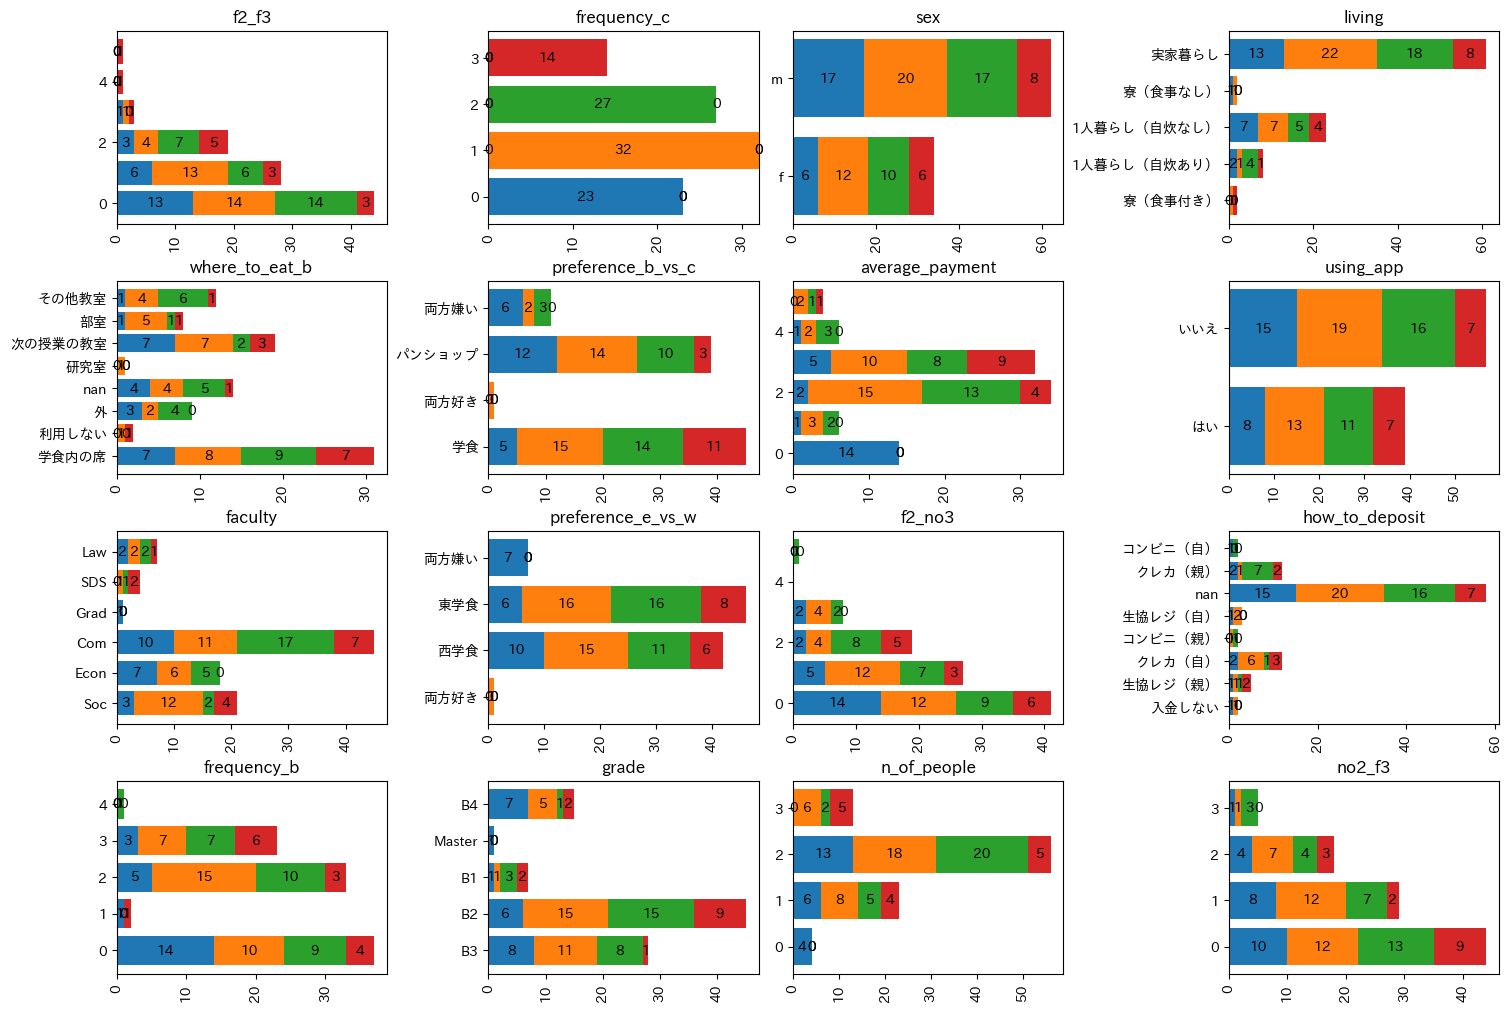

In [10]:
#exclusion_set = set(["when_to_use", 
#                     'reasons_for_using_c', 
#                     'reasons_for_not_using_c', 
#                     'frequently_chose_menu', 
#                     'good_points_of_c', 
#                     'bad_points_of_c', 
#                     'impression_of_c', 
#                     'reasons_e_vs_w', 
#                     'reasons_for_using_app', 
#                     'reasons_for_not_using_app', 
#                     'desirable_features'])
#column_set = set(column_names)
#new_column_set = column_set - exclusion_set
#new_column_list = list(new_column_set)
#fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout="constrained")
#cnt = 0
#for i in range(4):
#    for j in range(4):
#       axs[i, j].set_title(new_column_list[cnt])
#       axs[i, j].tick_params(axis="x", rotation=90)
#       y_labels = list(set(df5[new_column_list[cnt]]))
#       heights = [len(df5[df5[new_column_list[cnt]] == y_labels[k]]) for k in range(len(y_labels))]
#       p = axs[i, j].barh(y_labels, heights)
#       axs[i, j].bar_label(p, label_type="center", color="white")
#       cnt += 1 

exclusion_set = set(["when_to_use", 
                     'reasons_for_using_c', 
                     'reasons_for_not_using_c', 
                     'frequently_chose_menu', 
                     'good_points_of_c', 
                     'bad_points_of_c', 
                     'impression_of_c', 
                     'reasons_e_vs_w', 
                     'reasons_for_using_app', 
                     'reasons_for_not_using_app', 
                     'desirable_features'])
column_set = set(column_names)
new_column_set = column_set - exclusion_set
new_column_list = list(new_column_set)
fig, axs = plt.subplots(4, 4, figsize=(15, 10), layout="constrained")
cnt = 0
for i in range(4):
    for j in range(4):
        axs[i, j].set_title(new_column_list[cnt])
        axs[i, j].tick_params(axis="x", rotation=90)
        y_labels = list(set(df5[new_column_list[cnt]]))
        labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
        heights = [[len(df5[(df5[new_column_list[cnt]] == y_labels[k]) & (df5["frequency_c"] == l)]) for k in range(len(y_labels))] for l in range(4)]
        left = np.zeros(len(y_labels))
        for k in range(4):
            p = axs[i, j].barh(y_labels, heights[k], label=labels[k], left=left)
            left += heights[k]
            axs[i, j].bar_label(p, label_type="center")
        cnt += 1


In [11]:
df_dummy = pd.read_csv("final.csv")

In [12]:
df_dummy

Q1_B1  Q1_B2  Q1_B3  Q1_B4  Q1_Master  Q2_Com  Q2_Econ  Q2_Law  Q2_Soc  \
0       0      0      1      0          0       1        0       0       0   
1       0      0      0      1          0       1        0       0       0   
2       0      0      1      0          0       1        0       0       0   
3       0      0      1      0          0       1        0       0       0   
4       0      1      0      0          0       0        0       0       1   
..    ...    ...    ...    ...        ...     ...      ...     ...     ...   
91      0      0      1      0          0       1        0       0       0   
92      0      0      1      0          0       1        0       0       0   
93      0      0      0      1          0       1        0       0       0   
94      0      0      1      0          0       1        0       0       0   
95      0      0      1      0          0       1        0       0       0   

    Q2_SDS  ...  Q26_Âà©Áî®‰æ°ÂÄ§„Åå„Å™„ÅÑ„Åã„Çâ  Q26_„Åù„ÇÇ„Åù„ÇÇÁü•„Çâ„Å™„Åã„Å£„Åü  Q26_‰Ωø„ÅÑÊñπ„Åå„Çè„Åã„Çâ„Å™„ÅÑ„Åã„Çâ  \
0        0  ...              1               0                0   
1        0  ...              0               0                0   
2        0  ...              1               0                0   
3        0  ...              0               0                1   
4        0  ...              0               0                0   
..     ...  ...            ...             ...              ...   
91       0  ...              1               0                0   
92       0  ...              0               0                0   
93       0  ...              0               0                1   
94       0  ...              0               0                0   
95       0  ...              1               0                0   

    Q26_Â≠¶È£ü„ÇíÂà©Áî®„Åó„Å™„ÅÑ„Åã„Çâ  Q27_„Ç¢„Éó„É™„ÅÆËªΩ„Åï  Q27_„ÇØ„É¨„Ç´„Å®„ÅÆÁ¥ê„Å•„Åë  Q27_„ÇØ„Éº„Éù„É≥„ÅÆÈÖçÂ∏É  Q27_„Éâ„Éº„Éä„ÉÑÊÉÖÂ†±  \
0                0           0             0            0           0   
1                0           0             0            0           0   
2                0           0             0            1           0   
3                0           0             0            1           0   
4                0           0             0            1           0   
..             ...         ...           ...          ...         ...   
91               0           0             0            0           0   
92               0           0             0            1           0   
93               0           0             0            0           0   
94               0           0             1            1           0   
95               0           0             0            1           0   

    Q27_„É¢„Éê„Ç§„É´„Ç™„Éº„ÉÄ„Éº  Q27_Ê∑∑ÈõëÁä∂Ê≥Å„ÅÆÁ¢∫Ë™ç  
0              1            0  
1              1            0  
2              0            0  
3              0            0  
4              0            0  
..           ...          ...  
91             0            0  
92             0            0  
93             0            1  
94             1            0  
95             0            1  

[96 rows x 156 columns]

In [13]:
questions = [[1, "Â≠¶Âπ¥"], 
             [2, "Â≠¶ÈÉ®"], 
             [3, "ÊÄßÂà•"], 
             [4, "Â±Ö‰ΩèÂΩ¢ÊÖã"], 
             [5, "2ÈôêÂØæÈù¢3Èôê„Å™„Åó"], 
             [6, "2Èôê„Å™„Åó3ÈôêÂØæÈù¢"], 
             [7, "2ÈôêÂØæÈù¢3ÈôêÂØæÈù¢"], 
             [8, "Â≠¶È£üÂà©Áî®È†ªÂ∫¶"], 
             [9, "Â≠¶È£üÂπ≥ÂùáÂà©Áî®È°ç"], 
             [10, "Â≠¶È£üÂà©Áî®ÊôÇÈñìÂ∏Ø"], 
             [11, "Â≠¶È£üÂà©Áî®‰∫∫Êï∞"], 
             [12, "Â≠¶È£ü„ÇíÂà©Áî®„Åô„ÇãÁêÜÁî±"], 
             [13, "Â≠¶È£ü„ÇíÂà©Áî®„Åó„Å™„ÅÑÁêÜÁî±"], 
             [14, "„Çà„ÅèÈÅ∏„Å∂„É°„Éã„É•„Éº"], 
             [15, "Â≠¶È£ü„ÅÆÂ•Ω„Åç„Å™ÁÇπ"], 
             [16, "Â≠¶È£ü„ÅÆÂ´å„ÅÑ„Å™ÁÇπ"], 
             [17, "Â≠¶È£ü„ÅÆÂç∞Ë±°"], 
             [18, "Ë•øÂ≠¶È£ü„Å®Êù±Â≠¶È£ü„ÅÆ„Å©„Å°„Çâ„ÅåÂ•Ω„Åç„Åã"], 
             [19, "Ë•øorÊù±Â≠¶È£ü„ÅåÂ•Ω„Åç„Å™ÁêÜÁî±"], 
             [20, "„Éë„É≥„Ç∑„Éß„ÉÉ„ÉóÂà©Áî®È†ªÂ∫¶"], 
             [21, "Â≠¶È£ü„Å®„Éë„É≥„Ç∑„Éß„ÉÉ„Éó„ÅÆ„Å©„Å°„Çâ„ÅåÂ•Ω„Åç„Åã"], 
             [22, "„Éë„É≥„Ç∑„Éß„ÉÉ„Éó„ÅßË≤∑„Å£„Åü„ÇÇ„ÅÆ„Çí„Å©„Åì„ÅßÈ£ü„Åπ„Çã„Åã"], 
             [23, "ÁîüÂçî„Ç¢„Éó„É™„Çí‰Ωø„Å£„Å¶„ÅÑ„Çã„Åã"], 
             [24, "ÁîüÂçî„Ç¢„Éó„É™„Çí‰Ωø„ÅÜÁêÜÁî±"], 
             [25, "ÁîüÂçî„Ç¢„Éó„É™„Å∏„ÅÆÂÖ•ÈáëÊñπÊ≥ï"], 
             [26, "ÁîüÂçî„Ç¢„Éó„É™„Çí‰Ωø„Çè„Å™„ÅÑÁêÜÁî±"], 
             [27, "ÁîüÂçî„Ç¢„Éó„É™„Å´Ê±Ç„ÇÅ„ÇãÊ©üËÉΩ"]]

In [14]:
def extract_columns(df: DataFrame, question_number: int):
    columns = list(df.columns)
    p = re.compile(f'^Q{question_number}_')
    idxs = []
    for column in columns:
        result = p.match(column)
        if result is not None:
            idxs.append(columns.index(column))
    new_df = df.iloc[:, idxs[0]:idxs[-1]+1]
    return new_df

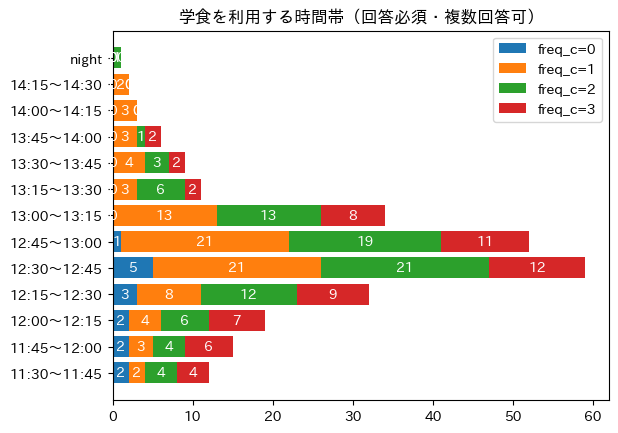

In [15]:
#df_when_to_use = extract_columns(df_dummy, 10)
#y_labels = list(df_when_to_use.columns)
#y_labels = [label[4:].replace("~", "ÔΩû") for label in y_labels]
#heights = list(df_when_to_use.sum())
#fig, ax = plt.subplots()
#p = ax.barh(y_labels, heights)
#ax.set_title("Â≠¶È£ü„ÇíÂà©Áî®„Åô„ÇãÊôÇÈñìÂ∏ØÔºàË§áÊï∞ÂõûÁ≠îÔºâ")
#ax.bar_label(p, label_type="center", color="white")

df_when_to_use = extract_columns(df_dummy, 10)
y_labels = list(df_when_to_use.columns)
new_y_labels = [label[4:].replace("~", "ÔΩû") for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("Â≠¶È£ü„ÇíÂà©Áî®„Åô„ÇãÊôÇÈñìÂ∏ØÔºàÂõûÁ≠îÂøÖÈ†à„ÉªË§áÊï∞ÂõûÁ≠îÂèØÔºâ")
ax.legend()

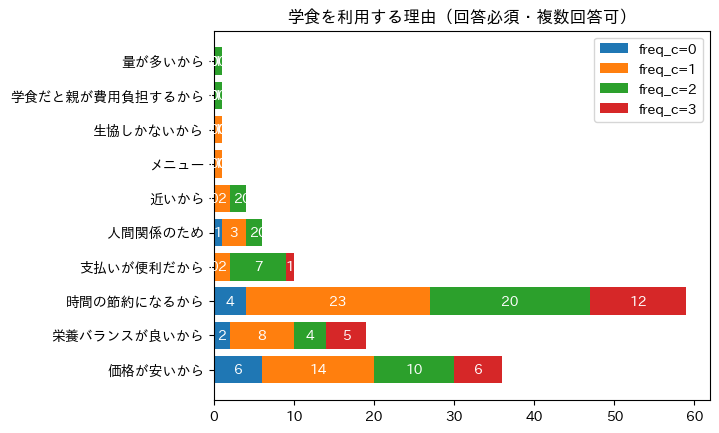

In [16]:
#df_reasons_for_using_c = extract_columns(df_dummy, 12)
#y_labels = list(df_reasons_for_using_c.columns)
#y_labels = [label[4:] for label in y_labels]
#heights = list(df_reasons_for_using_c.sum())
#fig, ax = plt.subplots()
#p = ax.barh(y_labels, heights)
#ax.set_title("Â≠¶È£ü„ÇíÂà©Áî®„Åô„ÇãÁêÜÁî±ÔºàË§áÊï∞ÂõûÁ≠îÔºâ")
#ax.bar_label(p, label_type="center", color="white")

df_reasons_for_using_c = extract_columns(df_dummy, 12)
y_labels = list(df_reasons_for_using_c.columns)
new_y_labels = [label[4:].replace("~", "ÔΩû") for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("Â≠¶È£ü„ÇíÂà©Áî®„Åô„ÇãÁêÜÁî±ÔºàÂõûÁ≠îÂøÖÈ†à„ÉªË§áÊï∞ÂõûÁ≠îÂèØÔºâ")
ax.legend()

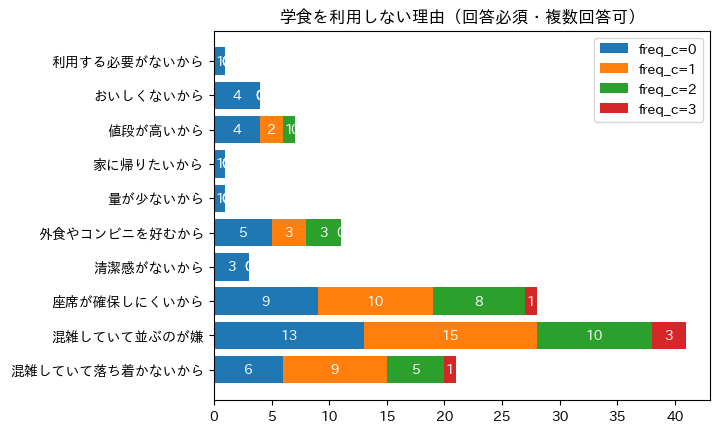

In [17]:
#df_reasons_for_not_using_c = extract_columns(df_dummy, 13)
#y_labels = list(df_reasons_for_not_using_c.columns)
#y_labels = [label[4:] for label in y_labels]
#heights = list(df_reasons_for_not_using_c.sum())
#fig, ax = plt.subplots()
#p = ax.barh(y_labels, heights)
#ax.set_title("Â≠¶È£ü„ÇíÂà©Áî®„Åó„Å™„ÅÑÁêÜÁî±ÔºàË§áÊï∞ÂõûÁ≠îÔºâ")
#ax.bar_label(p, label_type="center", color="white")

df_reasons_for_not_using_c = extract_columns(df_dummy, 13)
y_labels = list(df_reasons_for_not_using_c.columns)
new_y_labels = [label[4:].replace("~", "ÔΩû") for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("Â≠¶È£ü„ÇíÂà©Áî®„Åó„Å™„ÅÑÁêÜÁî±ÔºàÂõûÁ≠îÂøÖÈ†à„ÉªË§áÊï∞ÂõûÁ≠îÂèØÔºâ")
ax.legend()

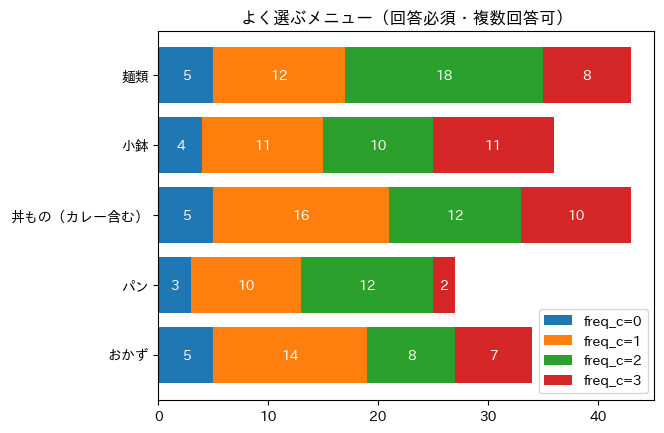

In [18]:
df_frequently_chose_menu = extract_columns(df_dummy, 14)
y_labels = list(df_frequently_chose_menu.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("„Çà„ÅèÈÅ∏„Å∂„É°„Éã„É•„ÉºÔºàÂõûÁ≠îÂøÖÈ†à„ÉªË§áÊï∞ÂõûÁ≠îÂèØÔºâ")
ax.legend()

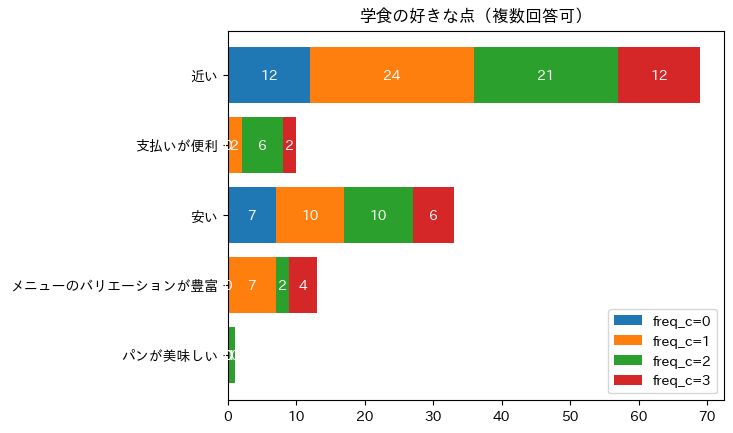

In [19]:
df_good_points_of_c = extract_columns(df_dummy, 15)
y_labels = list(df_good_points_of_c.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("Â≠¶È£ü„ÅÆÂ•Ω„Åç„Å™ÁÇπÔºàË§áÊï∞ÂõûÁ≠îÂèØÔºâ")
ax.legend()

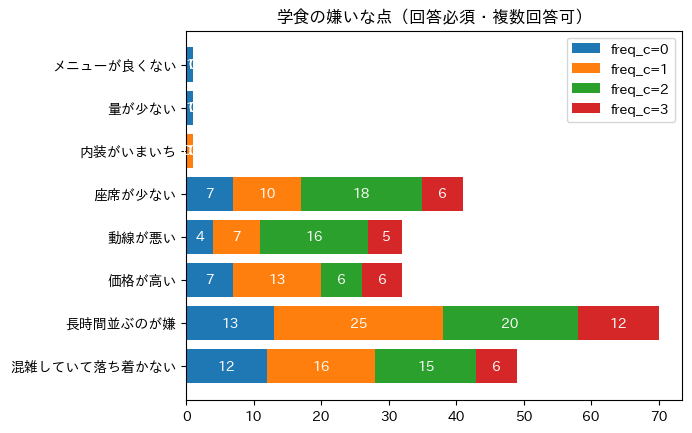

In [20]:
df_bad_points_of_c = extract_columns(df_dummy, 16)
y_labels = list(df_bad_points_of_c.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("Â≠¶È£ü„ÅÆÂ´å„ÅÑ„Å™ÁÇπÔºàÂõûÁ≠îÂøÖÈ†à„ÉªË§áÊï∞ÂõûÁ≠îÂèØÔºâ")
ax.legend()

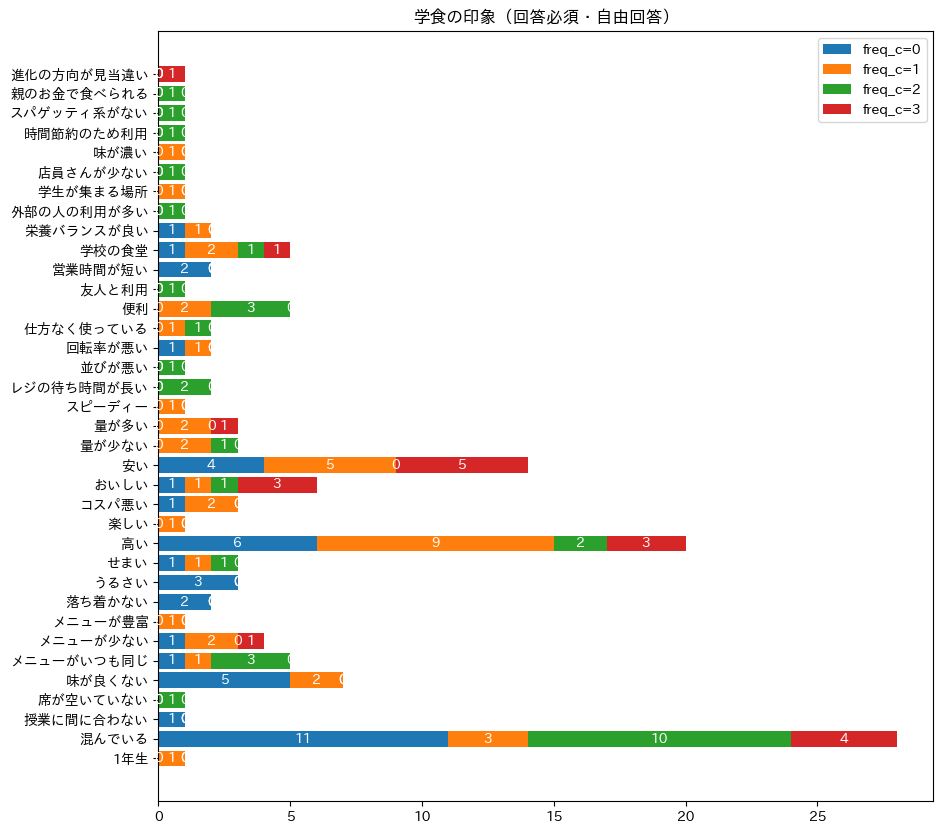

In [21]:
df_impression_of_c = extract_columns(df_dummy, 17)
df_impression_of_c.drop(["Q17_impression_of_c", "Q17_positive", "Q17_neutral", "Q17_negative"], axis="columns", inplace=True)
y_labels = list(df_impression_of_c.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("Â≠¶È£ü„ÅÆÂç∞Ë±°ÔºàÂõûÁ≠îÂøÖÈ†à„ÉªËá™Áî±ÂõûÁ≠îÔºâ")
ax.legend()

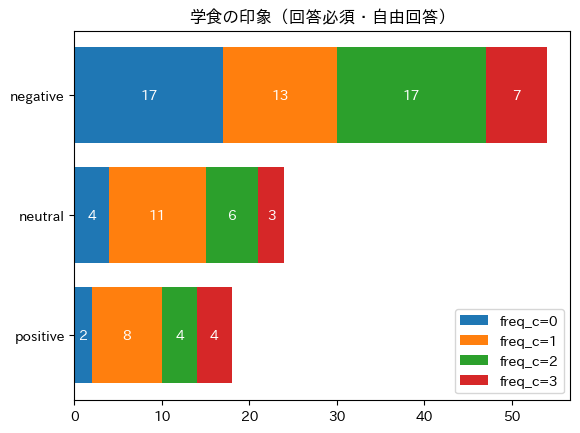

In [22]:
df_impression_of_c_classif = pd.concat([df_dummy["Q17_positive"], df_dummy["Q17_neutral"], df_dummy["Q17_negative"]], axis=1)
y_labels = list(df_impression_of_c_classif.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("Â≠¶È£ü„ÅÆÂç∞Ë±°ÔºàÂõûÁ≠îÂøÖÈ†à„ÉªËá™Áî±ÂõûÁ≠îÔºâ")
ax.legend()

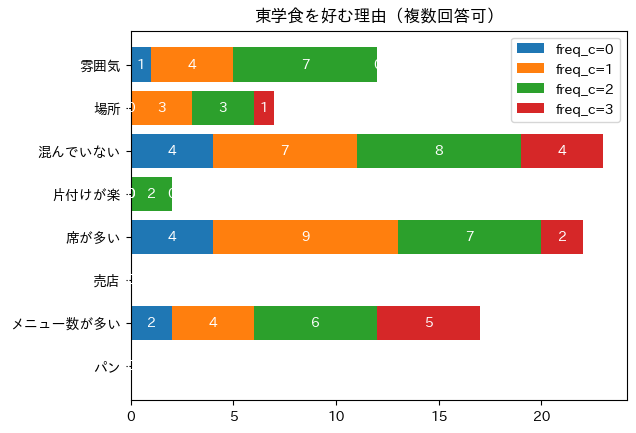

In [23]:
df_reasons_for_prefering_e = df_dummy[df_dummy["Q18_prefer_east"] == 1]
df_reasons_e_vs_w = extract_columns(df_dummy, 19)
y_labels = list(df_reasons_e_vs_w.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_reasons_for_prefering_e[(df_reasons_for_prefering_e[y_labels[i]] == 1) & (df_reasons_for_prefering_e["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("Êù±Â≠¶È£ü„ÇíÂ•Ω„ÇÄÁêÜÁî±ÔºàË§áÊï∞ÂõûÁ≠îÂèØÔºâ")
ax.legend()

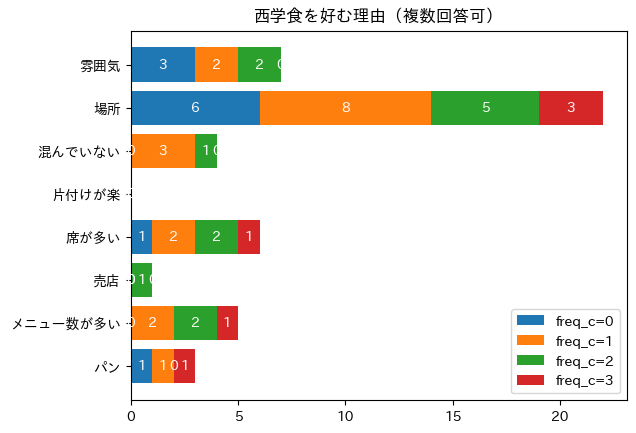

In [24]:
df_reasons_for_prefering_w = df_dummy[df_dummy["Q18_prefer_west"] == 1]
df_reasons_e_vs_w = extract_columns(df_dummy, 19)
y_labels = list(df_reasons_e_vs_w.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_reasons_for_prefering_w[(df_reasons_for_prefering_w[y_labels[i]] == 1) & (df_reasons_for_prefering_w["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("Ë•øÂ≠¶È£ü„ÇíÂ•Ω„ÇÄÁêÜÁî±ÔºàË§áÊï∞ÂõûÁ≠îÂèØÔºâ")
ax.legend()

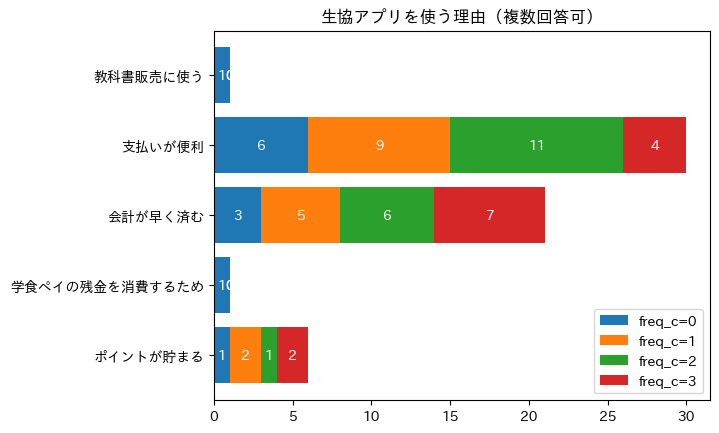

In [25]:
df_reasons_for_using_app = extract_columns(df_dummy, 24)
y_labels = list(df_reasons_for_using_app.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("ÁîüÂçî„Ç¢„Éó„É™„Çí‰Ωø„ÅÜÁêÜÁî±ÔºàË§áÊï∞ÂõûÁ≠îÂèØÔºâ")
ax.legend()

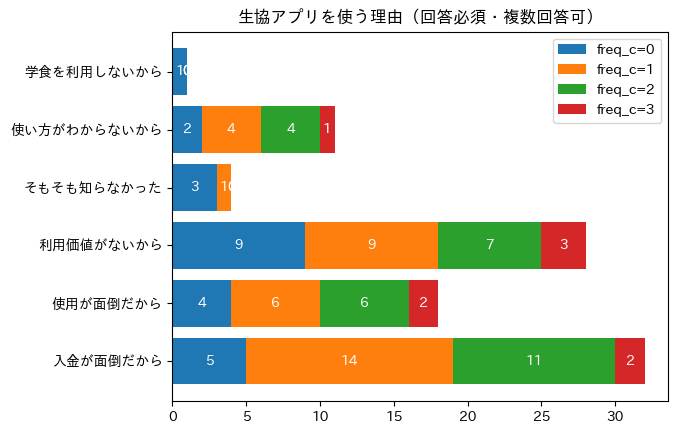

In [26]:
df_reasons_for_not_using_app = extract_columns(df_dummy, 26)
y_labels = list(df_reasons_for_not_using_app.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("ÁîüÂçî„Ç¢„Éó„É™„Çí‰Ωø„ÅÜÁêÜÁî±ÔºàÂõûÁ≠îÂøÖÈ†à„ÉªË§áÊï∞ÂõûÁ≠îÂèØÔºâ")
ax.legend()

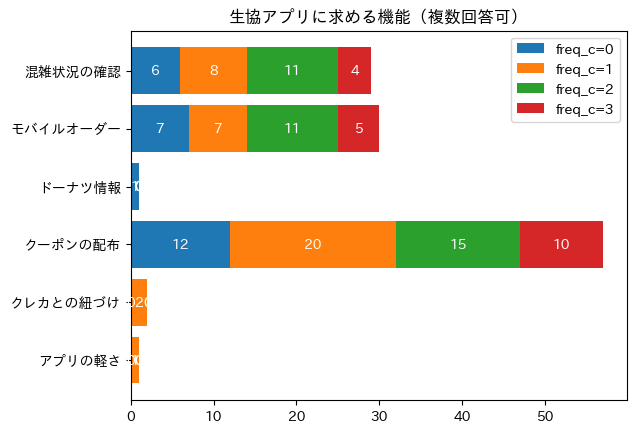

In [27]:
df_desirable_features = extract_columns(df_dummy, 27)
y_labels = list(df_desirable_features.columns)
new_y_labels = [label[4:] for label in y_labels]
labels = ["freq_c=0", "freq_c=1", "freq_c=2", "freq_c=3"]
heights = [[len(df_dummy[(df_dummy[y_labels[i]] == 1) & (df_dummy["Q8_frequency_c"] == j)]) for i in range(len(y_labels))] for j in range(4)]
left = np.zeros(len(y_labels))
fig, ax = plt.subplots()
for i in range(4):
    p = ax.barh(new_y_labels, heights[i], left=left, label=labels[i])
    ax.bar_label(p, label_type="center", color="white")
    left += heights[i]
ax.set_title("ÁîüÂçî„Ç¢„Éó„É™„Å´Ê±Ç„ÇÅ„ÇãÊ©üËÉΩÔºàË§áÊï∞ÂõûÁ≠îÂèØÔºâ")
ax.legend()

<Axes: title={'center': 'Â≠¶Âπ¥„Å®ÁîüÂçîÂà©Áî®È†ªÂ∫¶„ÅÆÁõ∏Èñ¢'}>

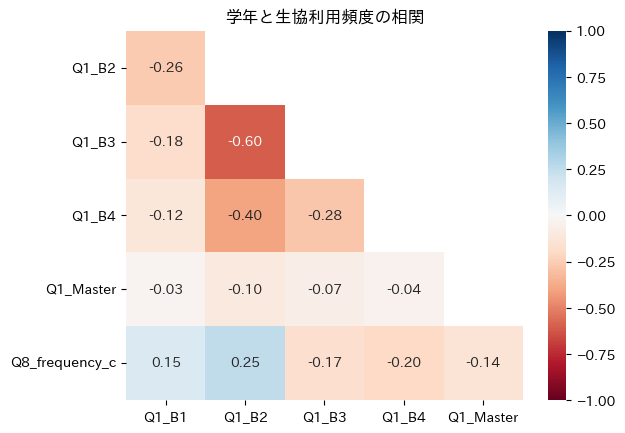

In [28]:
df_tmp = pd.concat([extract_columns(df_dummy, 1), extract_columns(df_dummy, 8)], axis=1)
df_corr = df_tmp.corr()
r, c = df_corr.shape
cnt = 0
for i in range(r):
    for j in range(cnt, c):
        df_corr.iloc[i, j] = float("nan")
    cnt += 1
df_corr = df_corr.iloc[1:, :c-1]
fig, ax = plt.subplots()
ax.set_title("Â≠¶Âπ¥„Å®ÁîüÂçîÂà©Áî®È†ªÂ∫¶„ÅÆÁõ∏Èñ¢")
sns.heatmap(df_corr, vmax=1, vmin=-1, cmap="RdBu", annot=True, fmt=".2f")

C:\Users\thiyo\AppData\Local\Temp\ipykernel_27048\4245169482.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df5 = df4["grade"].replace({"B1": 1, "B2": 2, "B3": 3, "B4": 4, "Master": 5})


<Axes: title={'center': 'Â≠¶Âπ¥„Å®ÁîüÂçîÂà©Áî®È†ªÂ∫¶„ÅÆÁõ∏Èñ¢'}>

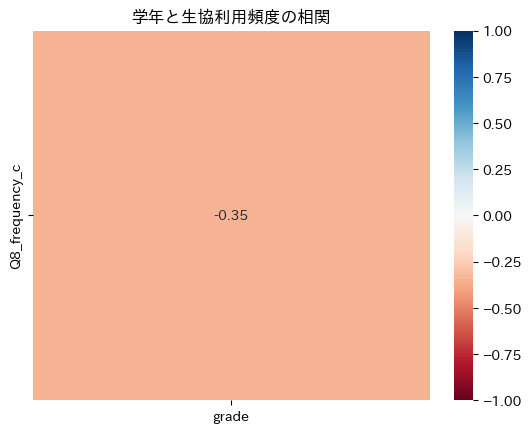

In [29]:
df5 = df4["grade"].replace({"B1": 1, "B2": 2, "B3": 3, "B4": 4, "Master": 5})
df_tmp = pd.concat([df5, extract_columns(df_dummy, 8)], axis=1)
df_corr = df_tmp.corr()
r, c = df_corr.shape
cnt = 0
for i in range(r):
    for j in range(cnt, c):
        df_corr.iloc[i, j] = float("nan")
    cnt += 1
df_corr = df_corr.iloc[1:, :c-1]
fig, ax = plt.subplots()
ax.set_title("Â≠¶Âπ¥„Å®ÁîüÂçîÂà©Áî®È†ªÂ∫¶„ÅÆÁõ∏Èñ¢")
sns.heatmap(df_corr, vmax=1, vmin=-1, cmap="RdBu", annot=True, fmt=".2f")

<Axes: >

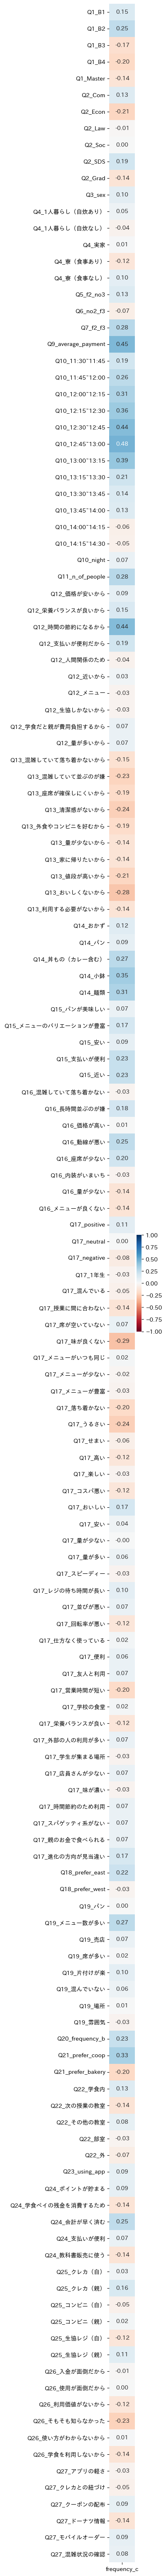

In [30]:
df_dummy_tmp = df_dummy.drop(columns=["Q8_frequency_c", "Q17_impression_of_c"])
fig, ax = plt.subplots(figsize=(1, 80))
df_corr = df_dummy_tmp.corrwith(df_dummy["Q8_frequency_c"])
df_corr1 = df_corr.to_frame("frequency_c")
sns.heatmap(df_corr1, vmax=1, vmin=-1, cmap="RdBu", annot=True, fmt=".2f")

### ‰ªÆË™¨
Ê†ÑÈ§ä„Éª‰Ωø„ÅÑ„ÇÑ„Åô„Åï„ÉªÂ±ÖÂøÉÂú∞„ÅÆ3„Å§„ÅÆËª∏„ÅßÊîπÈù©„ÇíË°å„ÅÜ

In [44]:
df_y = df_dummy["Q8_frequency_c"]
df_x = pd.concat([df4["grade"].replace({"B1": 1, "B2": 2, "B3": 3, "B4": 4, "Master": 5}).to_frame("Q1_grade"), 
                  df_dummy[["Q12_Ê†ÑÈ§ä„Éê„É©„É≥„Çπ„ÅåËâØ„ÅÑ„Åã„Çâ", 
                            "Q12_ÊôÇÈñì„ÅÆÁØÄÁ¥Ñ„Å´„Å™„Çã„Åã„Çâ", 
                            "Q12_‰∫∫ÈñìÈñ¢‰øÇ„ÅÆ„Åü„ÇÅ", 
                            "Q13_„Åä„ÅÑ„Åó„Åè„Å™„ÅÑ„Åã„Çâ", 
                            "Q13_Ê∑∑Èõë„Åó„Å¶„ÅÑ„Å¶‰∏¶„Å∂„ÅÆ„ÅåÂ´å", 
                            "Q16_ÂãïÁ∑ö„ÅåÊÇ™„ÅÑ"]]], axis=1)

C:\Users\thiyo\AppData\Local\Temp\ipykernel_27048\2595416662.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_x = pd.concat([df4["grade"].replace({"B1": 1, "B2": 2, "B3": 3, "B4": 4, "Master": 5}).to_frame("Q1_grade"),


<Axes: >

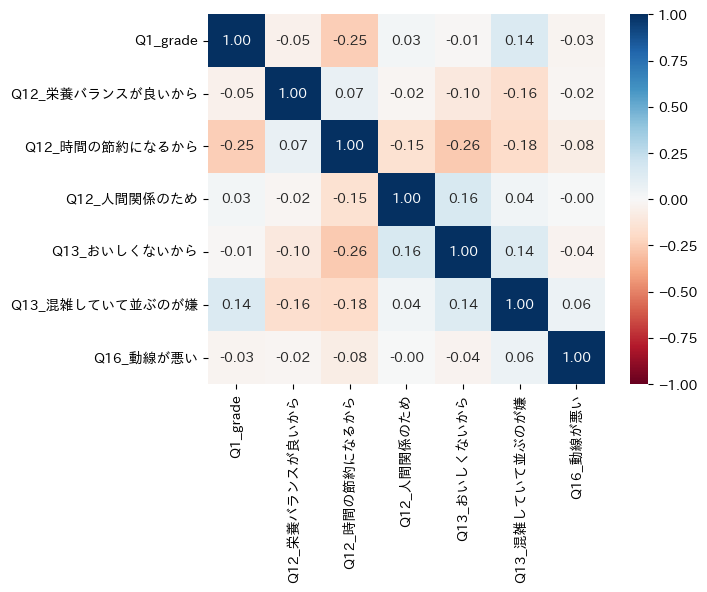

In [45]:
df_corr = df_x.corr()
ax.set_title("Ë™¨ÊòéÂ§âÊï∞ÂêåÂ£´„ÅÆÁõ∏Èñ¢„ÉÅ„Çß„ÉÉ„ÇØ")
sns.heatmap(df_corr, vmax=1, vmin=-1, cmap="RdBu", annot=True, fmt=".2f")

In [46]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_x.values, i) for i in range(df_x.shape[1])]
vif["features"] = df_x.columns
vif

VIF_Factor         features
0    3.273408         Q1_grade
1    1.251744  Q12_Ê†ÑÈ§ä„Éê„É©„É≥„Çπ„ÅåËâØ„ÅÑ„Åã„Çâ
2    2.047490   Q12_ÊôÇÈñì„ÅÆÁØÄÁ¥Ñ„Å´„Å™„Çã„Åã„Çâ
3    1.099988      Q12_‰∫∫ÈñìÈñ¢‰øÇ„ÅÆ„Åü„ÇÅ
4    1.122895     Q13_„Åä„ÅÑ„Åó„Åè„Å™„ÅÑ„Åã„Çâ
5    1.828517  Q13_Ê∑∑Èõë„Åó„Å¶„ÅÑ„Å¶‰∏¶„Å∂„ÅÆ„ÅåÂ´å
6    1.434124        Q16_ÂãïÁ∑ö„ÅåÊÇ™„ÅÑ

In [47]:
df_x = df_x.set_axis(["X1", "X2", "X3", "X4", "X5", "X6", "X7"], axis="columns")
model = sm.OLS(df_y, sm.add_constant(df_x))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         Q8_frequency_c   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     7.702
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           3.06e-07
Time:                        12:05:18   Log-Likelihood:                -112.94
No. Observations:                  96   AIC:                             241.9
Df Residuals:                      88   BIC:                             262.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4984      0.341      4.397      0.0

In [48]:
3.06 * 10**(-7)

3.06e-07